## Objectif
Depuis une feature1 et une feature2 on doit être capable de detecter le price

In [100]:
# Importe la bibliothèque NumPy, qui est largement utilisée pour les opérations numériques en Python.
import numpy as np

# Importe la bibliothèque Pandas, qui fournit des structures de données et des outils pour l'analyse de données.
import pandas as pd

# Importe la bibliothèque Seaborn pour la visualisation de données statistiques.
import seaborn as sns

# Importe la bibliothèque Matplotlib, une bibliothèque de traçage 2D qui produit des graphiques de qualité.
import matplotlib.pyplot as plt

# Importe la fonction train_test_split de scikit-learn pour diviser les données en ensembles d'entraînement et de test.
from sklearn.model_selection import train_test_split

# Importe MinMaxScaler de scikit-learn, qui est utilisé pour normaliser les données entre 0 et 1.
from sklearn.preprocessing import MinMaxScaler

In [101]:
# Lecture des données à partir du fichier CSV et stockage dans la DataFrame (structure de données tabulaire bidimensionnelle)
df = pd.read_csv("fake_reg.csv")
# Affichage des cinq premières lignes du DataFrame pour avoir un aperçu des données
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


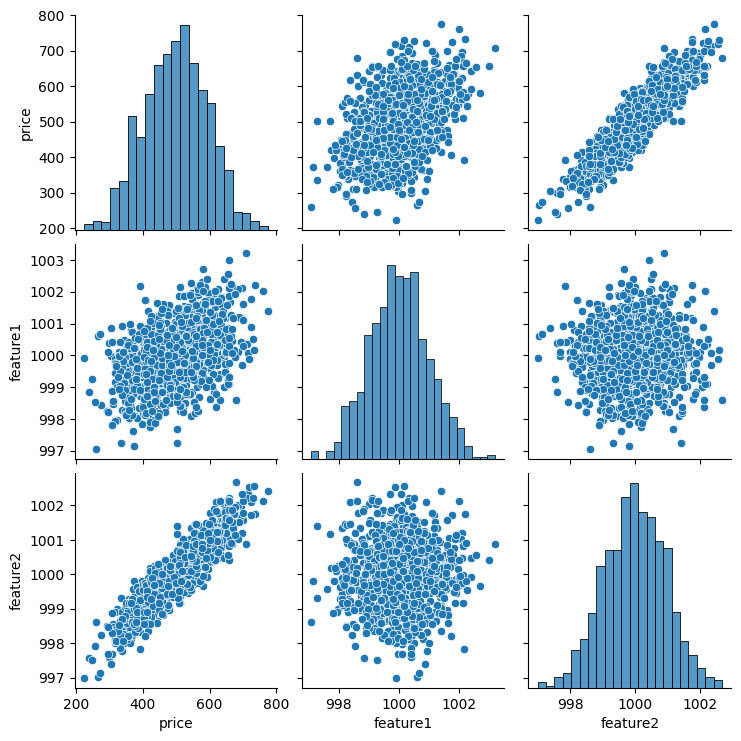

In [102]:
# Montrer sous forme de graphique les relations deux à deux entre les variables (dans ce cas, 'price', 'feature1', 'feature2')
sns.pairplot(df);

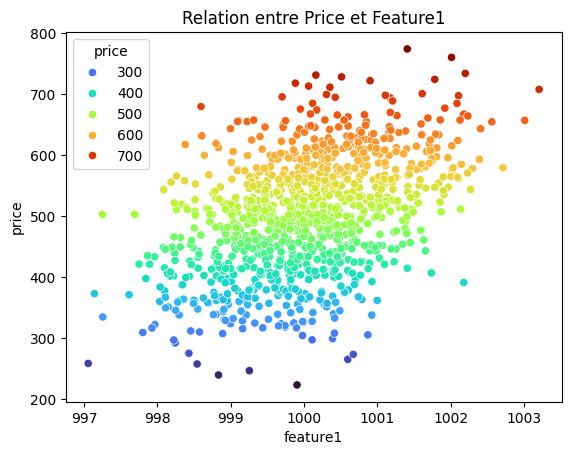

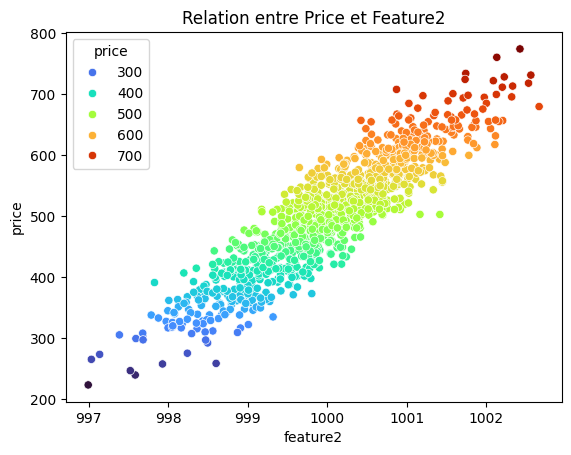

In [103]:
# Utilisation de seaborn pour créer un nuage de points (scatterplot) avec 'feature1' sur l'axe des x, 'price' sur l'axe des y
# Chaque point est coloré en fonction de la valeur de 'price' avec une palette de couleurs 'turbo'
sns.scatterplot(x='feature1', y='price', data=df, hue='price', palette='turbo')
# Ajout d'un titre au graphique
plt.title('Relation entre Price et Feature1')
# Affichage du graphique
plt.show()

# Utilisation de seaborn pour créer un nuage de points (scatterplot) avec 'feature2' sur l'axe des x, 'price' sur l'axe des y
# Chaque point est coloré en fonction de la valeur de 'price' avec une palette de couleurs 'turbo'
sns.scatterplot(x='feature2', y='price', data=df, hue='price', palette='turbo')

# Ajout d'un titre au graphique
plt.title('Relation entre Price et Feature2')

# Affichage du graphique
plt.show()


In [104]:
# Sélection des colonnes 'feature1' et 'feature2' du DataFrame 'df' pour construire la matrice d'entrée X
X = df[["feature1", "feature2"]].values

In [105]:
# Sélection de la colonne 'price' du DataFrame 'df' pour construire le vecteur cible y
y = df["price"].values

## Division des données
La division des données en ensembles d'entraînement et de test permet d'évaluer le modèle sur des données non utilisées pendant l'entraînement. Cela simule une situation réaliste où le modèle doit traiter de nouvelles données, garantissant ainsi une évaluation impartiale de sa performance. De plus, cette division prévient le surajustement en évitant que le modèle apprenne par cœur les exemples d'entraînement, favorisant ainsi une généralisation efficace.

In [106]:
# X : Caractéristiques (inputs)
# y : Target (étiquettes)

# Diviser les données en ensembles d'entraînement et de test
# - X_train : Ensemble des caractéristiques pour l'entraînement du modèle
# - X_test  : Ensemble des caractéristiques pour tester la performance du modèle
# - y_train : Étiquettes correspondant à l'ensemble d'entraînement
# - y_test  : Étiquettes correspondant à l'ensemble de test
# - test_size=0.3 : 30% des données sont réservées pour l'ensemble de test, le reste est utilisé pour l'entraînement
# - random_state=42 : Fixe la seed pour la génération aléatoire, assurant une reproductibilité des résultats
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(300, 2) (300,)
(700, 2) (700,)


## Normalisation

La normalisation les ramène à une échelle commune, disons de 0 à 1. Cela aide l'algorithme à mieux comprendre et à travailler avec ces données, en évitant que des caractéristiques avec des valeurs plus grandes dominent celles avec des valeurs plus petites. 

In [108]:
# Initialiser le scaler
scaler = MinMaxScaler()

# Adapter (fit) le scaler sur l'ensemble d'entraînement et transformer les données
X_train = scaler.fit_transform(X_train)

# Transformer l'ensemble de test en utilisant les mêmes paramètres de normalisation
X_test = scaler.transform(X_test)

# Afficher les résultats
print("X_train après normalisation :\n", X_train)
print("X_test après normalisation :\n", X_test)

X_train après normalisation :
 [[0.74046017 0.32583248]
 [0.43166001 0.2555088 ]
 [0.18468554 0.70500664]
 ...
 [0.54913363 0.79933822]
 [0.2834197  0.38818708]
 [0.56282703 0.42371827]]
X_test après normalisation :
 [[ 0.39533339  0.38540671]
 [ 0.57300502  0.74070924]
 [ 0.61294076  0.65734264]
 [ 0.38169528  0.73076311]
 [ 0.07776591  0.46323644]
 [ 0.49421971  0.68949258]
 [ 0.2065742   0.70096247]
 [ 0.55141988  0.41776773]
 [ 0.36812191  0.69082394]
 [ 0.56465724  0.3877465 ]
 [ 0.57048029  0.71810824]
 [ 0.79569525  0.47979901]
 [ 0.38488235  0.41856516]
 [ 0.33142545  0.42411972]
 [ 0.89361377  0.63912775]
 [ 0.50191166  0.39789174]
 [ 0.7159808   0.43688384]
 [ 0.35812192  0.92028225]
 [ 0.49989367  0.85589311]
 [ 0.63965434  0.59024789]
 [ 0.19053626  0.34203634]
 [ 0.40982896  0.45849208]
 [ 0.26844791  0.40167269]
 [ 0.38649709  0.33592759]
 [ 0.50654703  0.65789843]
 [ 0.41260556  0.79338075]
 [ 0.45631316  0.61323307]
 [ 0.44064792  0.40889315]
 [ 0.42963904  0.87598452]


## Création du modèle

In [109]:
# Importe une classe appelée Sequential qui aide à construire des modèles de réseau neuronal, étape par étape.
import tensorflow as tf
from tensorflow.keras.models import Sequential

# Importe une classe appelée Dense qui représente une couche de neurones connectés dans le réseau neuronal.
from tensorflow.keras.layers import Dense

### Choosing an optimizer and loss
```py
# Pour un problème de classification multi-classe où l'on classe les données dans plusieurs catégories (ex: chien, chat, souris etc...)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Pour un problème de classification binaire où l'on classe les données dans deux catégories (ex: spam ou pas)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# Pour un problème de régression où l'on veut prédire une valeur continue (ex: le prix d'une maison),
model.compile(optimizer='rmsprop', loss='mse')
```

In [126]:
# Crée un modèle séquentiel, qui est une pile linéaire de couches.
model = Sequential()

# Ajoute une couche Dense (c'est le layer d'entrée) avec 4 neurones (unités) et une fonction d'activation "relu".
model.add(Dense(4, activation="relu"))

# Ajoute de plusieurs couche Dense (ce sont les layers cachée) avec 4 neurones et une fonction d'activation "relu".
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))

# Ajoute une troisième couche Dense (c'est le layer de sortie) avec 1 neurone car où le modèle doit prédire une seule valeur (le prix).
model.add(Dense(1))

In [127]:
# Compile le modèle avec l'optimiseur 'rmsprop' et la fonction de perte 'mse' (Mean Squared Error).
# 
# Paramètres :
# - Optimiseur ('rmsprop') : Détermine comment le modèle est mis à jour pendant l'entraînement.
#   'rmsprop' est un optimiseur adaptatif qui ajuste le taux d'apprentissage en fonction des gradients passés.
# - Fonction de perte ('mse', Mean Squared Error) : Mesure l'écart moyen au carré entre les prédictions du modèle et les vraies valeurs.
#   'mse' est souvent utilisé dans les problèmes de régression, où l'objectif est de minimiser les écarts entre les prédictions et les vraies valeurs.
model.compile(optimizer='rmsprop', loss='mse')

## Entraînement du modèle

In [128]:
# Entraîne le modèle sur les données d'entraînement.
# - epochs=250 : Le nombre de fois où le modèle ajuste ses paramètres internes (poids et biais) en fonction de toutes les données d'entraînement.
#   Chaque époque est une itération complète à travers l'ensemble d'entraînement.
#   Plus d'époques permettent au modèle d'apprendre des modèles plus complexes et d'avoir moins d'erreurs

model.fit(X_train,y_train,epochs=250)

Epoch 1/250


22/22 [==============================] - 1s 2ms/step - loss: 256698.0625
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256626.1875
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256547.0000
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256456.4844
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256353.3438
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256236.6406
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256105.8906
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255960.3594
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255798.0156
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 255619.5625
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255422.5781
Epoch 12/250
22/22 [==============================] - 0s 2ms/step - loss: 2

<Axes: >

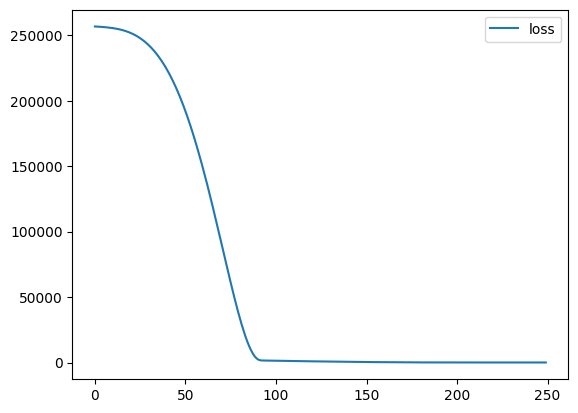

In [129]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Evaluation

Si les valeurs de perte sur les ensembles de test et d'entraînement sont proches, cela suggère que le modèle généralise bien aux nouvelles données (ensemble de test) et n'est pas trop ajusté aux données d'entraînement. Cela indique une meilleure performance du modèle.

In [170]:
# Évalue et imprime la performance du modèle sur l'ensemble de test (X_test, y_test).
# - model.evaluate(X_test, y_test, verbose=0) renvoie la valeur de la fonction de perte sur l'ensemble de test.
# - Une faible perte sur l'ensemble de test indique une bonne généralisation du modèle à de nouvelles données.
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Performance sur l'ensemble de test - Perte : {test_loss}")

# Évalue et imprime la performance du modèle sur l'ensemble d'entraînement (X_train, y_train).
# - model.evaluate(X_train, y_train, verbose=0) renvoie la valeur de la fonction de perte sur l'ensemble d'entraînement.
# - Comparer la perte sur l'ensemble d'entraînement avec celle sur l'ensemble de test peut indiquer un surajustement.
train_loss = model.evaluate(X_train, y_train, verbose=0)
print(f"Performance sur l'ensemble d'entraînement - Perte : {train_loss}")


Performance sur l'ensemble de test - Perte : 25.01318359375
Performance sur l'ensemble d'entraînement - Perte : 24.2100772857666


In [179]:
# Effectue des prédictions sur l'ensemble de test en utilisant le modèle entraîné.
# - model.predict(X_test) génère des prédictions pour chaque échantillon dans X_test.
test_predictions = model.predict(X_test)
test_predictions

 1/10 [==>...........................] - ETA: 0s

10/10 [==============================] - 0s 2ms/step


array([[404.9669 ],
       [623.11774],
       [591.71295],
       [571.85315],
       [366.3601 ],
       [578.7849 ],
       [514.72754],
       [458.7413 ],
       [548.8817 ],
       [447.1549 ],
       [611.3681 ],
       [548.50946],
       [418.77457],
       [408.5568 ],
       [650.7567 ],
       [436.9483 ],
       [508.04242],
       [659.53516],
       [662.162  ],
       [565.1226 ],
       [333.96225],
       [444.4962 ],
       [382.23254],
       [378.44217],
       [566.20276],
       [610.202  ],
       [532.0178 ],
       [427.52277],
       [655.0371 ],
       [413.73575],
       [442.27783],
       [484.76895],
       [438.0731 ],
       [681.4225 ],
       [424.3946 ],
       [417.37863],
       [501.5089 ],
       [550.08307],
       [509.4012 ],
       [395.0854 ],
       [618.16125],
       [416.28644],
       [604.02765],
       [445.58447],
       [501.62372],
       [581.2603 ],
       [668.51984],
       [490.02274],
       [318.27365],
       [485.07312],


In [180]:
# Transforme les prédictions du modèle sur l'ensemble de test en une série Pandas.
# - Les prédictions sont reshapées pour s'assurer qu'elles sont compatibles avec une série Pandas.
test_predictions = pd.Series(test_predictions.reshape(300,))

In [181]:
# Crée un DataFrame Pandas contenant les vraies valeurs et les prédictions du modèle.
# - 'y_test' contient les vraies valeurs de l'ensemble de test.
# - 'test_predictions' contient les prédictions du modèle sur l'ensemble de test.
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)

pred_df.columns = ['Test True Y', 'Model Predictions']
pred_df


,Test True Y,Model Predictions
0,402.296319,404.966888
1,624.156198,623.117737
2,582.455066,591.712952
3,578.588606,571.853149
4,371.224104,366.360107
...,...,...
295,525.704657,528.687805
296,502.909473,515.038391
297,612.727910,609.230530
298,417.569725,416.603943


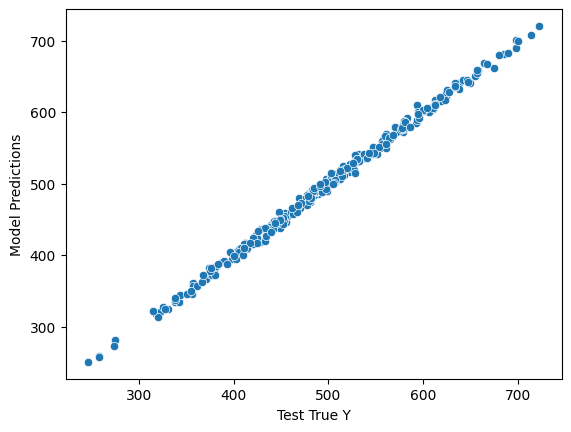

In [184]:
# Renomme les colonnes du DataFrame pour correspondre aux noms attendus dans le tracé.
# - 'Test True Y' représente les vraies valeurs de l'ensemble de test.
# - 'Model Predictions' représente les prédictions du modèle sur l'ensemble de test.
pred_df.columns = ['Test True Y', 'Model Predictions']

# Utilise les noms de colonnes corrects dans le tracé d'un nuage de points.
# - 'Test True Y' est sur l'axe des x, représentant les vraies valeurs.
# - 'Model Predictions' est sur l'axe des y, représentant les prédictions du modèle.
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

# Affiche le graphique.
plt.show()

# Le graphique à points illustre visuellement la relation entre les vraies valeurs de l'ensemble de test ('Test True Y')
# et les prédictions du modèle ('Model Predictions').
# - L'objectif est d'observer une tendance linéaire où les points suivent une ligne, indiquant une bonne performance du modèle.


In [194]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcule et imprime la moyenne des erreurs entre les vraies valeurs et les prédictions du modèle.

# MAE (Mean Absolute Error) mesure la moyenne des loss/erreurs sans considérer si elles sont trop élevées ou trop basses.
# - Une MAE de 0 signifierait des prédictions parfaites, mais dans la réalité, cela est rare.

# MAE : Plus la valeur est basse, mieux le modèle prédit les prix.
mae = mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])
print(f"Erreur absolue moyenne (MAE) : {mae}")
error_percent = mae/ df['price'].mean()
print(f"pourcentage d'erreur: {error_percent*100:.1f}%")


Erreur absolue moyenne (MAE) : 4.003658814492921
pourcentage d'erreur: 0.8%


In [191]:
df.describe()

498.6730289967182


,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


## Sauvegarde

In [197]:
from tensorflow.keras.models import load_model
model.save("my_model.keras")

In [205]:
later_model = load_model("my_model.keras")
print(later_model.predict(scaler.transform([[998, 1000]])))

1/1 [==============================] - 0s 70ms/step
[[419.40265]]
